# Part-B-Insights.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("property.xlsx", skiprows=8,skipfooter =1)

In [3]:
data.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
0,2019,JUL,100 Mile House,170 Cedar Ave. S.,BC,CA,B0067295,1182.02,SQ-M,Leased,51.645900,Ramasundar,-121.293764
1,2019,JUL,100 Mile House,300 Cariboo Hwy,BC,CA,N0092260,0.36,HA,Owned,NaN,Ramasundar,NaN
2,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076976,1467.89,SQ-M,Owned,51.644508,Ramasundar,-121.297664
3,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076984,23.40,SQ-M,Owned,51.644222,Ramasundar,-121.299028
4,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0081810,215.50,SQ-M,Owned,51.644139,Ramasundar,-121.297392


### B1) The total property area sold vs total property are leased in Sq-M only.

In [27]:
year = int(input("Enter the year: "))

Enter the year: 2018


In [5]:
d1 = data[(data["UoM"]=="SQ-M") & (data['Year']==year)]

In [6]:
d1.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
172,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002658,11.15,SQ-M,Owned,49.105522,Lucida,-121.363500
173,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002659,11.61,SQ-M,Owned,49.104260,Lucida,-121.634800
174,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002660,20.62,SQ-M,Owned,49.103180,Lucida,-121.634500
175,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002661,5.88,SQ-M,Owned,49.104572,Lucida,-121.635587
176,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002662,30.09,SQ-M,Owned,49.105490,Lucida,-121.634100


In [7]:
d1_leased = d1[d1["Tenure"] == "Leased"]
d1_owned  = d1[d1["Tenure"] == "Owned"]
totLeased = d1_leased["Area"].sum()
totOwned = d1_owned["Area"].sum()
print("In SQ-M\nTotal area Leased =",totLeased,"\nTotal area owned =",totOwned)

In SQ-M
Total area Leased = 73766.96 
Total area owned = 56914.37000000001


([<matplotlib.patches.Wedge at 0x22b0000b6d0>,
 [Text(-0.2213050872731415, 1.077508263702431, 'Total Area Leased'),
  Text(0.22130508727314088, -1.0775082637024311, 'Total Area Owned')],
 [Text(-0.1207118657853499, 0.5877317802013259, '56.45'),
  Text(0.12071186578534956, -0.587731780201326, '43.55')])

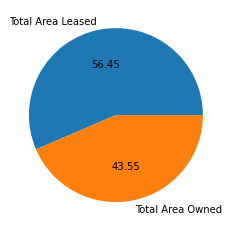

In [8]:
plt.pie([totLeased,totOwned],labels= ["Total Area Leased","Total Area Owned"],autopct='%.2f')

### B2) Of the years 2017,2018,2019- which year got maximum leased area in CA and WS countries.


In [9]:
data_CA = data[(data["Country"] == "CA") & (data["Tenure"] == "Leased")]
data_WS = data[(data["Country"] == "WS") & (data["Tenure"] == "Leased")]
data_WS.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
883,2018,JUL,Salmo Creston Summit,Summit Of Stagleap,BC,WS,B0092344,131.60,SQ-M,Leased,49.059076,Anderson,-117.039199
884,2018,JUL,Salmo Creston Summit,Summit Of Stagleap,BC,WS,N0001589,5.00,HA,Leased,NaN,Anderson,NaN
886,2018,JUL,Salmon Arm,351 Hudson Ave. N.E.,BC,WS,B0090378,191.94,SQ-M,Leased,50.702291,Anderson,-119.280780
887,2018,JUL,Salmon Arm,550 2nd. Ave N.E.,BC,WS,B0092308,1858.65,SQ-M,Leased,50.700583,Anderson,-119.279056
888,2018,JUL,Salmon Arm,550 Lakeshore Rd. N.E.,BC,WS,B0091854,824.98,SQ-M,Leased,50.704920,Anderson,-119.278596


In [10]:
data_CA_2017 = data_CA[data_CA["Year"] == 2017]
data_CA_2018 = data_CA[data_CA["Year"] == 2018]
data_CA_2019 = data_CA[data_CA["Year"] == 2019]
CA_2017 = data_CA_2017["Area"].sum()
CA_2018 = data_CA_2018["Area"].sum()
CA_2019 = data_CA_2019["Area"].sum()
print("Leased area in CA per year:")
print(f"2017: {CA_2017},\n2018: {CA_2018},\n2019: {CA_2019}")

Leased area in CA per year:
2017: 70660.0792,
2018: 66458.39110000001,
2019: 213945.70029999997


The maximum leased area in CA was in 2019.

In [11]:
data_WS_2017 = data_WS[data_WS["Year"] == 2017]
data_WS_2018 = data_WS[data_WS["Year"] == 2018]
data_WS_2019 = data_WS[data_WS["Year"] == 2019]
WS_2017 = data_WS_2017["Area"].sum()
WS_2018 = data_WS_2018["Area"].sum()
WS_2019 = data_WS_2019["Area"].sum()
print("Leased area in WS per year:")
print(f"2017: {WS_2017},\n2018: {WS_2018},\n2019: {WS_2019}")

Leased area in WS per year:
2017: 69052.36,
2018: 7328.419999999999,
2019: 62758.43609999999


The maximum leased area in WS was in 2017.

### B3) What are the Agent codes of all the agents who have got deals in ‘OWNED’ categories across the years.

In [28]:
year = int(input("Enter the year: "))

Enter the year: 2018


In [13]:
data_owned = data[(data["Tenure"]== "Owned")&(data["Year"]==year)]
data_owned.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
172,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002658,11.15,SQ-M,Owned,49.105522,Lucida,-121.363500
173,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002659,11.61,SQ-M,Owned,49.104260,Lucida,-121.634800
174,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002660,20.62,SQ-M,Owned,49.103180,Lucida,-121.634500
175,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002661,5.88,SQ-M,Owned,49.104572,Lucida,-121.635587
176,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002662,30.09,SQ-M,Owned,49.105490,Lucida,-121.634100


In [14]:
data_owned = data_owned.groupby("Year")
data_owned.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
172,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002658,11.15,SQ-M,Owned,49.105522,Lucida,-121.363500
173,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002659,11.61,SQ-M,Owned,49.104260,Lucida,-121.634800
174,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002660,20.62,SQ-M,Owned,49.103180,Lucida,-121.634500
175,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002661,5.88,SQ-M,Owned,49.104572,Lucida,-121.635587
176,2018,JUL,Chilliwack,57657 Chilliwack Lake Rd.,BC,WS,B1002662,30.09,SQ-M,Owned,49.105490,Lucida,-121.634100


In [15]:
print(data_owned["Agent"].nunique())
d = data_owned["Agent"].unique()
for i in d:
    print(i)

Year
2018    3
Name: Agent, dtype: int64
['Lucida' 'Mukesh' 'Anderson']


### B4) For the city of Chilliwack, which agent has got the maximum deals in leased form

In [16]:
data_chilliwack = data[data["City"] == "Chilliwack"]
data_chilliwack_leased = data_chilliwack[data_chilliwack["Tenure"] == "Leased"]

In [17]:
data_chilliwack_leased.groupby("Agent")
data_chilliwack_leased

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
123,2019,JUL,Chilliwack,45467 Yale Rd.,BC,CA,B0091696,534.000,SQ-M,Leased,49.148054,Alford,-121.965031
124,2019,JUL,Chilliwack,45540 Yale Rd.,BC,CA,B0092554,963.850,SQ-M,Leased,49.151503,Alford,-121.964110
125,2019,JUL,Chilliwack,45890 Victoria Ave.,BC,CA,B0067332,277.800,SQ-M,Leased,49.172572,Alford,-121.954536
126,2019,JUL,Chilliwack,45960 Wellington Ave.,BC,CA,B0091910,1014.780,SQ-M,Leased,49.171388,Alford,-121.953762
128,2019,JUL,Chilliwack,46360 Airport Rd.,BC,CA,B0091580,1882.000,SQ-M,Leased,49.155742,Alford,-121.941161
129,2019,JUL,Chilliwack,46360 Airport Rd.,BC,CA,B0092270,184.970,SQ-M,Leased,49.155425,Alford,-121.940508
130,2019,JUL,Chilliwack,46360 Airport Rd.,BC,CA,N0092272,0.458,HA,Leased,NaN,Alford,NaN
184,2018,JUL,Chilliwack,6640 Vedder Rd.,BC,CA,B1002341,305.740,SQ-M,Leased,49.123854,Lucida,-121.959926
185,2018,JUL,Chilliwack,8978 School St.,BC,CA,B0068140,1328.470,SQ-M,Leased,49.165331,Lucida,-121.960483


We can see that Alford has 7 and Lucida has 2 deals in leased form in the city of Chilliwack.
Hence, Alford has the maximum deals of such kind.

### B5) Compare the performance of all agents based on the area leased and owned  for the years 2017,2018 and 2019. Who has been the best performer?

In [18]:
data_year = data.groupby(["Year","Agent"])

In [19]:
data_year.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
0,2019,JUL,100 Mile House,170 Cedar Ave. S.,BC,CA,B0067295,1182.0200,SQ-M,Leased,51.645900,Ramasundar,-121.293764
1,2019,JUL,100 Mile House,300 Cariboo Hwy,BC,CA,N0092260,0.3600,HA,Owned,NaN,Ramasundar,NaN
2,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076976,1467.8900,SQ-M,Owned,51.644508,Ramasundar,-121.297664
3,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076984,23.4000,SQ-M,Owned,51.644222,Ramasundar,-121.299028
4,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0081810,215.5000,SQ-M,Owned,51.644139,Ramasundar,-121.297392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2017,JUL,Victoria,1515 Blanshard St.,BC,CA,N0001031,0.7608,HA,Owned,NaN,Subbarao,NaN
1111,2017,JUL,Victoria,1520 Blanshard St.,BC,CA,B0063404,3396.1000,SQ-M,Leased,48.428250,Subbarao,-123.362167
1112,2017,JUL,Victoria,1675 Douglas St.,BC,CA,B0067637,3390.5800,SQ-M,Leased,48.429194,Subbarao,-123.364000
1113,2017,JUL,Victoria,1802 Douglas St.,BC,CA,B0067183,6376.3700,SQ-M,Leased,48.430528,Subbarao,-123.364917


In [20]:
data_year["Area"].sum()

Year  Agent          
2017  Alford              29593.8090
      Lucida              13914.3562
      Subbarao           197999.8562
2018  Anderson            81852.1996
      Lucida               3916.4332
      Mukesh              44975.5461
2019  Alford              60342.3226
      Anderson            33344.7545
      Benjamin            94510.6454
      Lucida             153362.9382
      McDen               77545.5536
      Mukesh              93555.1494
      Ramasundar          22763.6769
      Ramasundar              0.3600
      Ravi Kumar          67688.3404
      Subbarao            88292.7933
2020  Lucida             200186.4284
      Subbarao            37067.9420
Name: Area, dtype: float64

In 2017, Subbarao, in 2018, Anderson and in 2019 as well as in 2020, Lucida performed the best in terms of area leased or owned.

### B6) What is the amount of property area sold for the month of july for all the years?

In [21]:
data_jul = data[data["Month"]=='JUL']
data_jul.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
0,2019,JUL,100 Mile House,170 Cedar Ave. S.,BC,CA,B0067295,1182.02,SQ-M,Leased,51.645900,Ramasundar,-121.293764
1,2019,JUL,100 Mile House,300 Cariboo Hwy,BC,CA,N0092260,0.36,HA,Owned,NaN,Ramasundar,NaN
2,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076976,1467.89,SQ-M,Owned,51.644508,Ramasundar,-121.297664
3,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076984,23.40,SQ-M,Owned,51.644222,Ramasundar,-121.299028
4,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0081810,215.50,SQ-M,Owned,51.644139,Ramasundar,-121.297392


In [22]:
data_jul=data_jul.groupby("Year")
data_jul.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
0,2019,JUL,100 Mile House,170 Cedar Ave. S.,BC,CA,B0067295,1182.0200,SQ-M,Leased,51.645900,Ramasundar,-121.293764
1,2019,JUL,100 Mile House,300 Cariboo Hwy,BC,CA,N0092260,0.3600,HA,Owned,NaN,Ramasundar,NaN
2,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076976,1467.8900,SQ-M,Owned,51.644508,Ramasundar,-121.297664
3,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076984,23.4000,SQ-M,Owned,51.644222,Ramasundar,-121.299028
4,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0081810,215.5000,SQ-M,Owned,51.644139,Ramasundar,-121.297392
54,2017,JUL,Bella Coola,636 Cliff St.,BC,CA,N0001484,0.1561,HA,Owned,NaN,Alford,NaN
55,2017,JUL,Bob Quinn Lake,Hwy. 37,BC,CA,N2000483,0.0279,HA,Leased,NaN,Alford,NaN
56,2017,JUL,Bob Quinn Lake,Stewart Cassiar Hwy. 37,BC,CA,B1002402,55.1800,SQ-M,Owned,56.977742,Alford,-130.250913
57,2017,JUL,Bob Quinn Lake,Stewart Cassiar Hwy. 37,BC,CA,B1002403,55.1800,SQ-M,Owned,56.981039,Alford,-130.248080
58,2017,JUL,Burnaby,3133 Sumner Ave.,BC,CA,B0067103,552.1300,SQ-M,Leased,49.255998,Alford,-123.008300


In [23]:
data_jul["Area"].sum()

Year
2017    241508.0214
2018    130744.1789
2019    691406.5343
2020    237254.3704
Name: Area, dtype: float64

### B7) The Company seeks a time series analysis report of the orders received.

In [24]:
data_year = data.groupby("Year")
data_year.head()

,Year,Month,City,Address,Prov,Country,Identifier,Area,UoM,Tenure,Latitude,Agent,Longitude
0,2019,JUL,100 Mile House,170 Cedar Ave. S.,BC,CA,B0067295,1182.0200,SQ-M,Leased,51.645900,Ramasundar,-121.293764
1,2019,JUL,100 Mile House,300 Cariboo Hwy,BC,CA,N0092260,0.3600,HA,Owned,NaN,Ramasundar,NaN
2,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076976,1467.8900,SQ-M,Owned,51.644508,Ramasundar,-121.297664
3,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0076984,23.4000,SQ-M,Owned,51.644222,Ramasundar,-121.299028
4,2019,JUL,100 Mile House,300 Cariboo Hwy.,BC,CA,B0081810,215.5000,SQ-M,Owned,51.644139,Ramasundar,-121.297392
54,2017,JUL,Bella Coola,636 Cliff St.,BC,CA,N0001484,0.1561,HA,Owned,NaN,Alford,NaN
55,2017,JUL,Bob Quinn Lake,Hwy. 37,BC,CA,N2000483,0.0279,HA,Leased,NaN,Alford,NaN
56,2017,JUL,Bob Quinn Lake,Stewart Cassiar Hwy. 37,BC,CA,B1002402,55.1800,SQ-M,Owned,56.977742,Alford,-130.250913
57,2017,JUL,Bob Quinn Lake,Stewart Cassiar Hwy. 37,BC,CA,B1002403,55.1800,SQ-M,Owned,56.981039,Alford,-130.248080
58,2017,JUL,Burnaby,3133 Sumner Ave.,BC,CA,B0067103,552.1300,SQ-M,Leased,49.255998,Alford,-123.008300


In [25]:
list(data_year["Area"].sum())

[241508.02140000006, 130744.17889999998, 691406.5343000002, 237254.37039999984]

Text(0.5, 1.0, 'Total area of land sold')

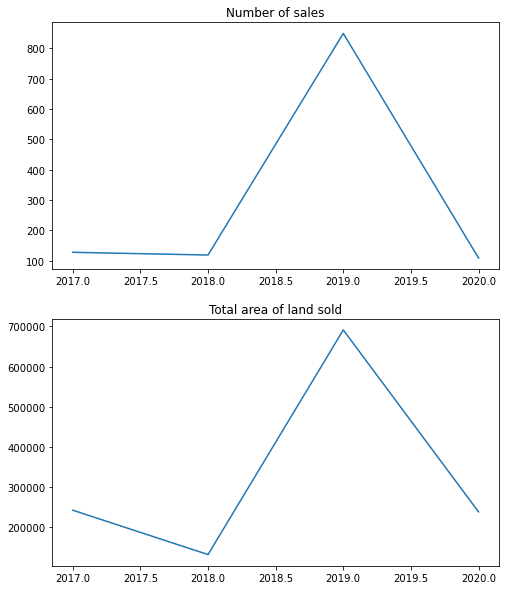

In [26]:
X = [2017,2018,2019,2020]
figure, axis = plt.subplots(nrows = 2, ncols=1,figsize =(8,10))
axis[0].plot(X, list(data_year["Identifier"].nunique()))
axis[0].set_title("Number of sales")
axis[1].plot(X, list(data_year["Area"].sum()))
axis[1].set_title("Total area of land sold")


We can see that the company had huge success in 2019, so the strategies used in the year were effective. The company can try to follow the tactics used in 2019 and try to emulate that performance.